# Student Mental Health Risk Analysis

## Abstract
This project explores mental health trends among students using a publicly available dataset. We examine correlations between gender, year of study, CGPA, and reported mental health issues such as depression, anxiety, and panic attacks. Our goal is to use decision tree classifiers to visualize how individual attributes relate to risk levels and uncover patterns that could inform early interventions.


## Introduction

Mental health among students is a growing concern, especially in competitive academic environments. Identifying at-risk students early can help institutions design support systems and resources. In this project, we use a dataset of survey responses to analyze how demographic and academic factors relate to self-reported mental health conditions. We apply machine learning techniques to uncover insights and trends.


## Dataset

The dataset, titled "Student Mental health," was sourced from Kaggle. It includes responses from students about their gender, CGPA, year of study, and whether they have experienced depression, anxiety, or panic attacks. We cleaned the data by removing unnecessary columns, standardizing text, and encoding categorical variables using LabelEncoder.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

file_path = "Student Mental health.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
df.shape


(101, 11)

In [ ]:
df.dtypes


,0
Timestamp,object
Choose your gender,object
Age,float64
What is your course?,object
Your current year of Study,object
What is your CGPA?,object
Marital status,object
Do you have Depression?,object
Do you have Anxiety?,object
Do you have Panic attack?,object


In [ ]:
df.nunique()


,0
Timestamp,92
Choose your gender,2
Age,7
What is your course?,49
Your current year of Study,7
What is your CGPA?,6
Marital status,2
Do you have Depression?,2
Do you have Anxiety?,2
Do you have Panic attack?,2


In [ ]:
df["Your current year of Study"] = df["Your current year of Study"].str.lower()


In [ ]:
df = df.drop(columns=["What is your course?", "Age", "Timestamp"])


In [ ]:
df.nunique()

,0
Choose your gender,2
Your current year of Study,4
What is your CGPA?,6
Marital status,2
Do you have Depression?,2
Do you have Anxiety?,2
Do you have Panic attack?,2
Did you seek any specialist for a treatment?,2


In [ ]:
print(df.columns.tolist())



['Choose your gender', 'Your current year of Study', 'What is your CGPA?', 'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']


In [ ]:
# ## Methodology

# We began by cleaning the dataset, removing redundant columns and standardizing string values. We then created a new binary column `"At Risk"` based on whether a student reported any of the three mental health issues. This allowed us to simplify our classification task.

# We used decision tree classifiers to examine how individual features such as gender or marital status relate to risk. We also used Seaborn visualizations to explore patterns in the dataset, such as how mental health issues vary by year of study or CGPA.


In [ ]:
df.isnull().sum()


,0
Choose your gender,0
Your current year of Study,0
What is your CGPA?,0
Marital status,0
Do you have Depression?,0
Do you have Anxiety?,0
Do you have Panic attack?,0
Did you seek any specialist for a treatment?,0


In [ ]:
df.rename(columns = {'Choose your gender': 'gender'}, inplace = True)


In [ ]:
print(df.columns)

Index(['gender', 'Your current year of Study', 'What is your CGPA?',
       'Marital status', 'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')


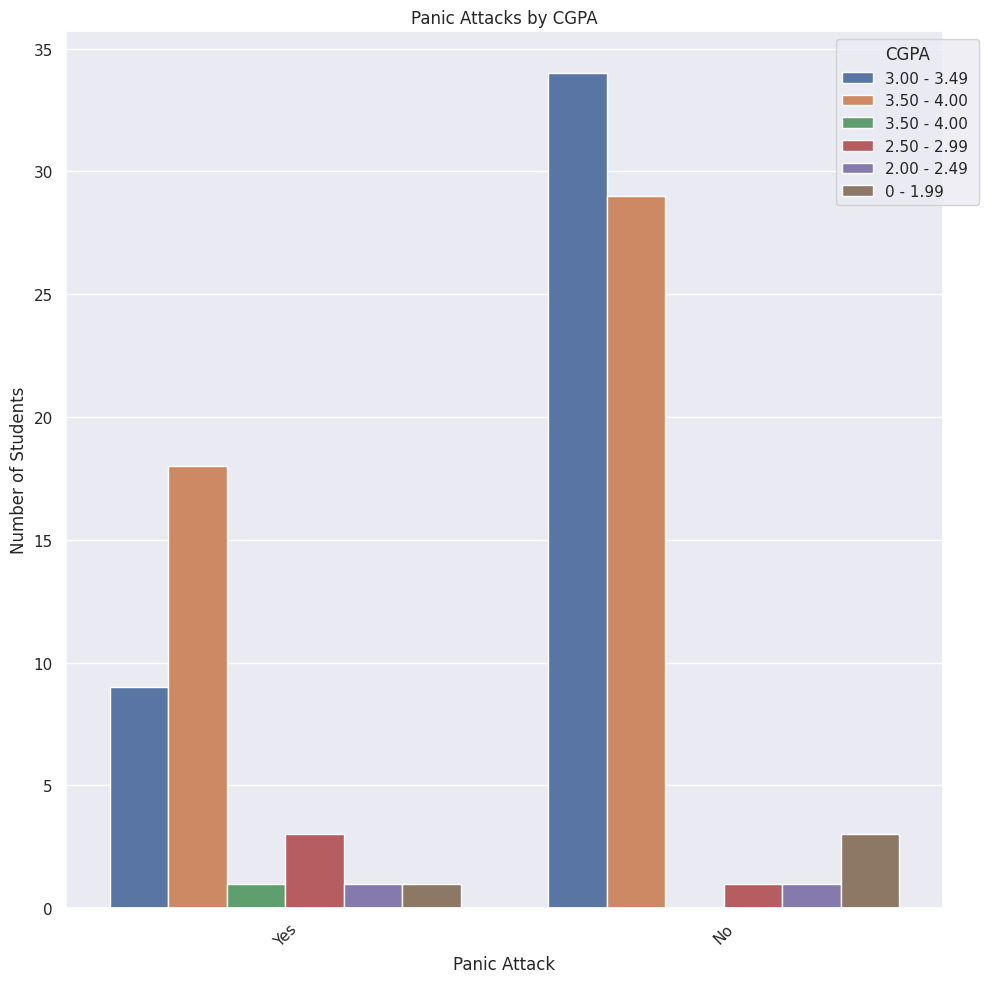

In [ ]:
df = pd.read_csv("Student Mental health.csv")
df.columns = df.columns.str.strip()

plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="Do you have Panic attack?", hue="What is your CGPA?")
plt.title("Panic Attacks by CGPA")
plt.xlabel("Panic Attack")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.legend(title="CGPA", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


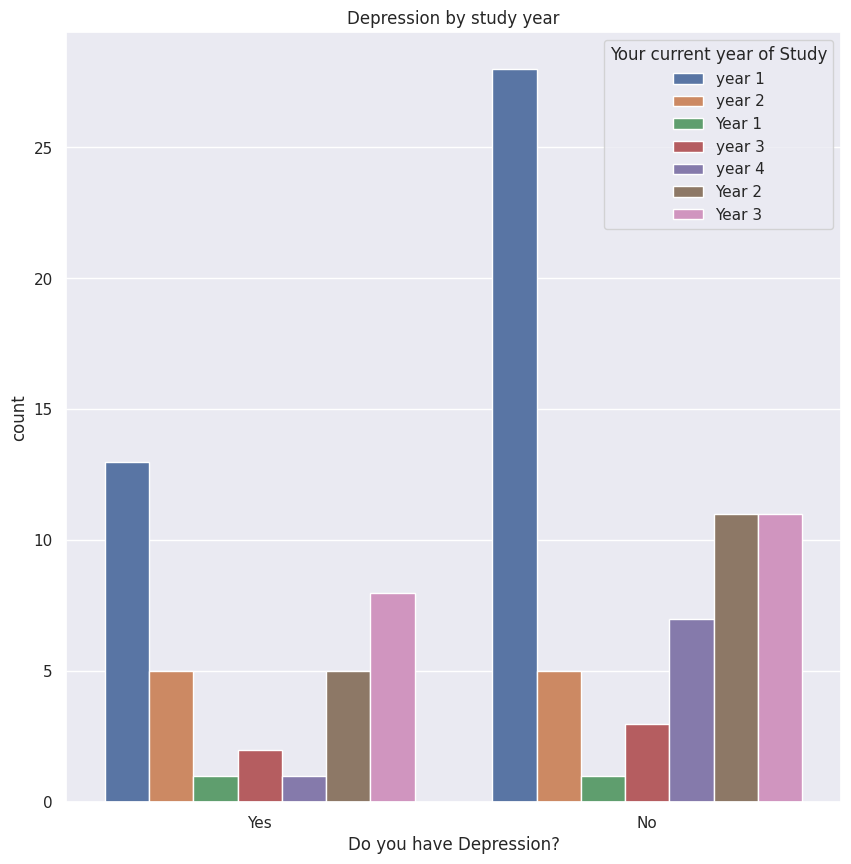

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Depression?", hue="Your current year of Study", data=df)
plt.title("Depression by study year")
plt.show()

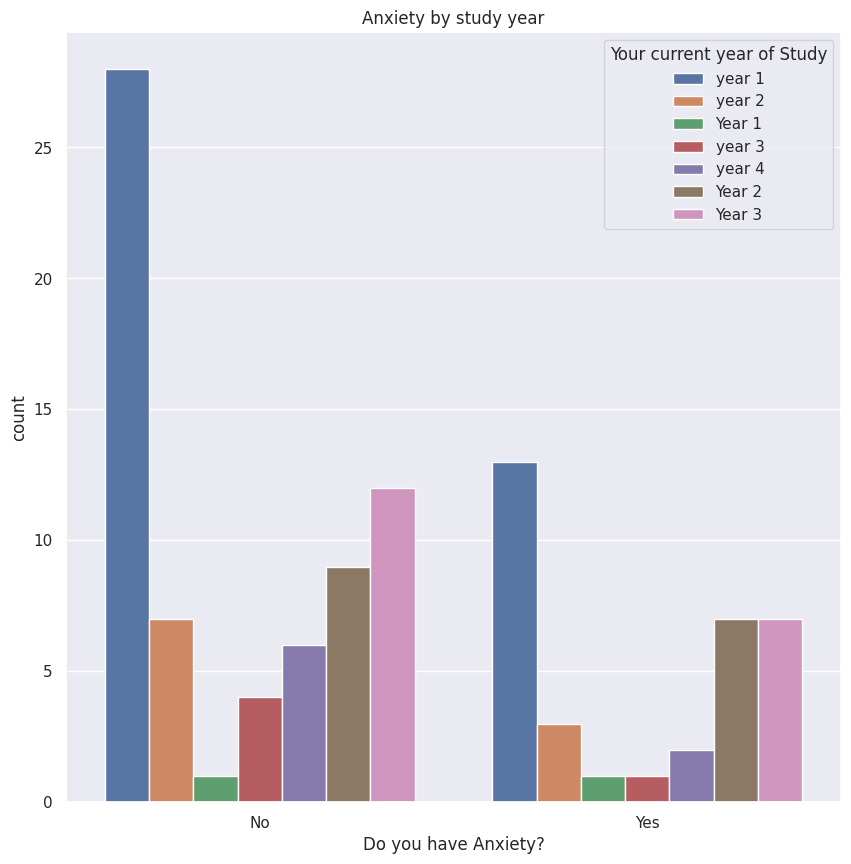

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Anxiety?", hue="Your current year of Study", data=df)
plt.title("Anxiety by study year")
plt.show()

In [ ]:
print(df.columns)

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')


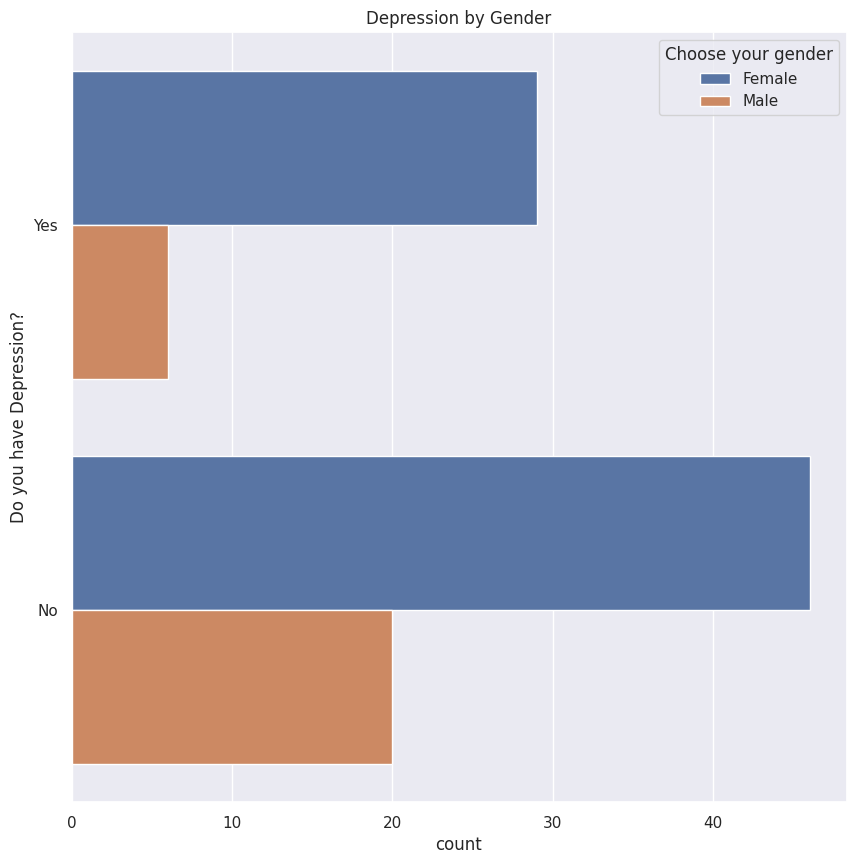

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Depression?", hue="Choose your gender", data=df)
plt.title("Depression by Gender")
plt.show()

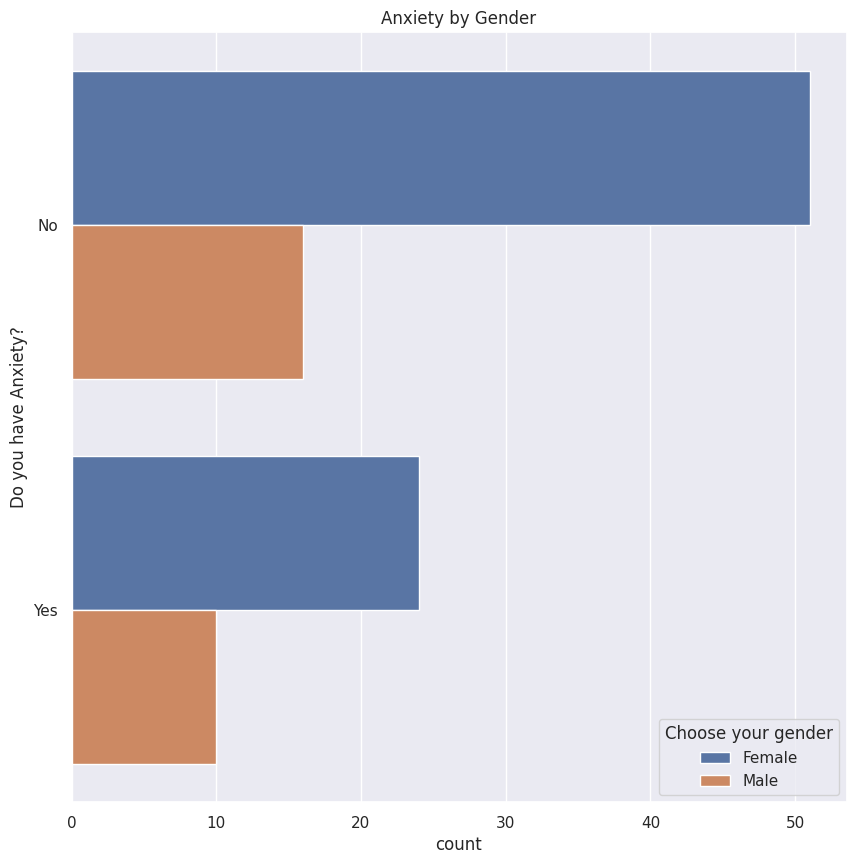

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Anxiety?", hue="Choose your gender", data=df)
plt.title("Anxiety by Gender")
plt.show()

In [ ]:
df["At Risk"] = df[[
    "Do you have Depression?",
    "Do you have Anxiety?",
    "Do you have Panic attack?"
]].apply(lambda row: "Yes" if "Yes" in row.values else "No", axis=1)


In [ ]:
df = df.drop(columns=["Do you have Depression?", "Do you have Anxiety?", "Do you have Panic attack?"], errors='ignore')


In [ ]:
print(df["What is your CGPA?"].unique())


['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']


In [ ]:
df["What is your CGPA?"] = df["What is your CGPA?"].str.strip().str.lower()


In [ ]:
print(df.columns)

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Did you seek any specialist for a treatment?', 'At Risk'],
      dtype='object')


In [ ]:
df = df.rename(columns={"Choose your gender": "gender"})


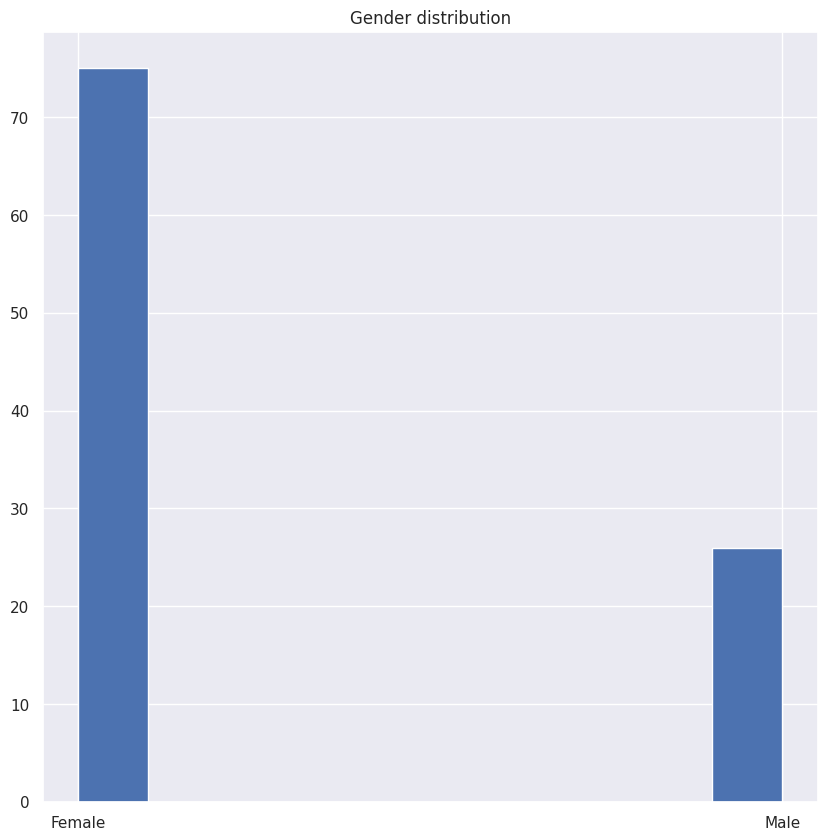

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df['gender'],color='b')
plt.title("Gender distribution");
plt.show()

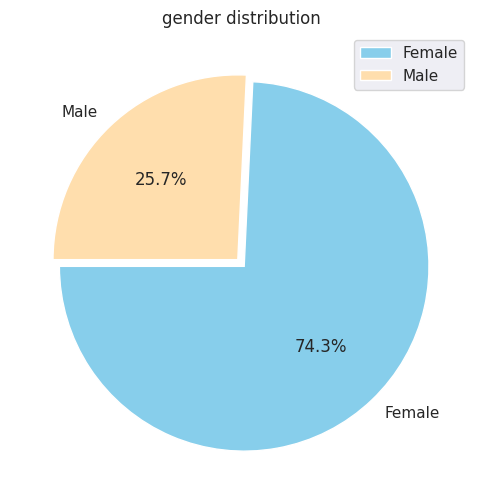

In [ ]:
plt.figure(figsize=(12,6))
plt.title("gender distribution")
g = plt.pie(df.gender.value_counts(), explode=(0.025,0.025), labels=df.gender.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

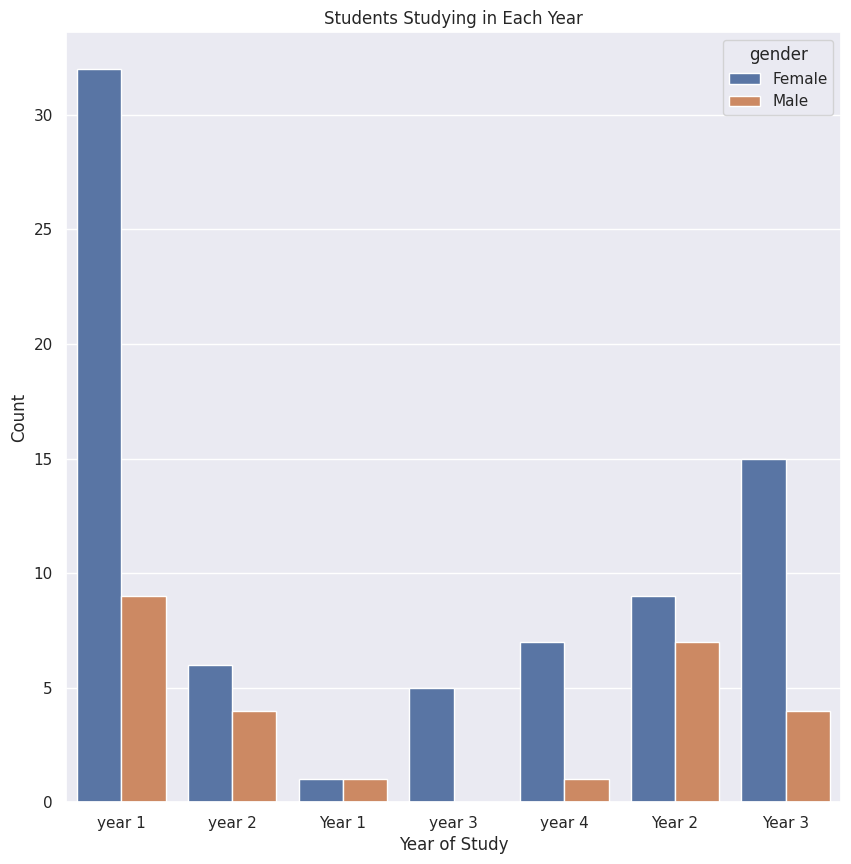

In [ ]:

plt.figure(figsize=(10, 10))

sns.countplot(data=df, x='Your current year of Study', hue='gender')

plt.title("Students Studying in Each Year")
plt.xlabel("Year of Study")
plt.ylabel("Count")
plt.show()

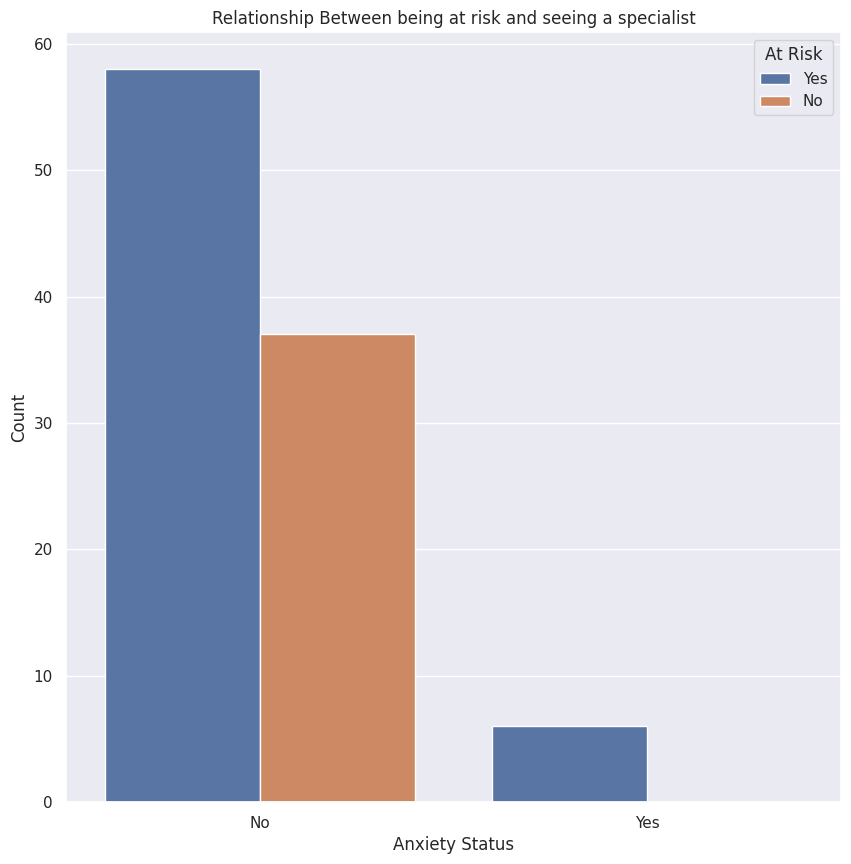

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='Did you seek any specialist for a treatment?', hue='At Risk')
plt.title("Relationship Between being at risk and seeing a specialist")
plt.xlabel("Anxiety Status")
plt.ylabel("Count")
plt.show()


In [ ]:
label_encoders = {}

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le


In [ ]:
X = df.drop(columns=["At Risk"])
y = df["At Risk"]


In [ ]:
X = df[["Marital status"]]
y = df["At Risk"]
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=1)
clf.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [ ]:
df["Predicted"] = clf.predict(X)
left_group = df[df["Marital status"] == 0]
right_group = df[df["Marital status"] == 1]


left_risk_pct = (left_group["Predicted"].sum() / len(left_group)) * 100
right_risk_pct = (right_group["Predicted"].sum() / len(right_group)) * 100


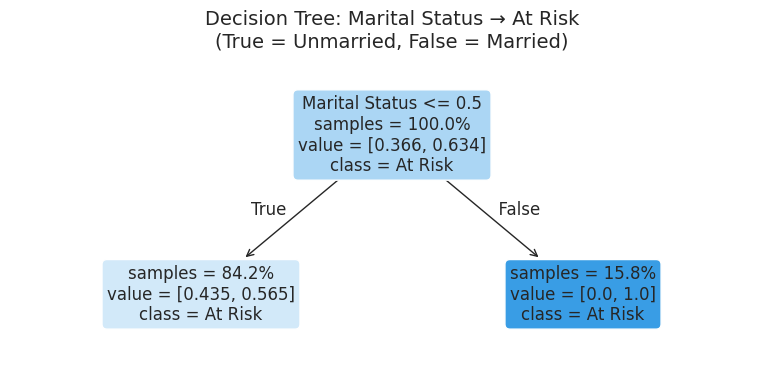

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=1)
clf.fit(X, y)

plt.figure(figsize=(8, 4))
plot_tree(clf,
          feature_names=["Marital Status"],
          class_names=["Not at Risk", "At Risk"],
          filled=True,
          rounded=True,
          impurity=False,
          proportion=True,
          fontsize=12)

plt.title("Decision Tree: Marital Status → At Risk\n(True = Unmarried, False = Married)", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns)


Index(['Timestamp', 'gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Did you seek any specialist for a treatment?', 'At Risk', 'Predicted'],
      dtype='object')


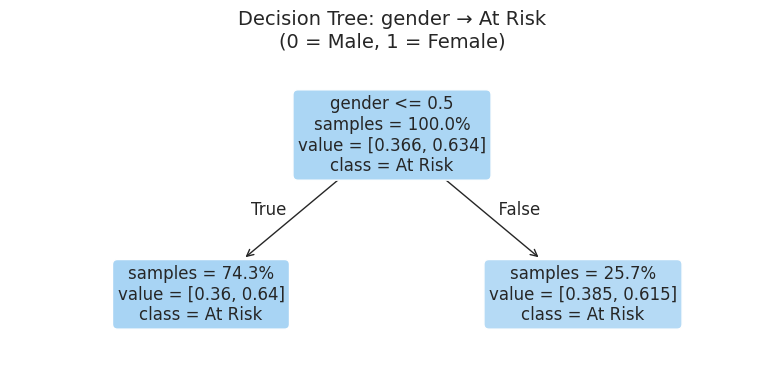

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_gender_encoded = le.fit_transform(df["gender"])  # returns a 1D array

X_gender_encoded = X_gender_encoded.reshape(-1, 1)

clf_gender = DecisionTreeClassifier(criterion="entropy", max_depth=1)
clf_gender.fit(X_gender_encoded, y)

plt.figure(figsize=(8, 4))
plot_tree(clf_gender,
          feature_names=["gender"],
          class_names=["Not at Risk", "At Risk"],
          filled=True,
          rounded=True,
          impurity=False,
          proportion=True,
          fontsize=12)
plt.title("Decision Tree: gender → At Risk\n(0 = Male, 1 = Female)", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
df.nunique()

,0
Timestamp,92
gender,2
Age,7
What is your course?,49
Your current year of Study,7
What is your CGPA?,5
Marital status,2
Did you seek any specialist for a treatment?,2
At Risk,2
Predicted,1


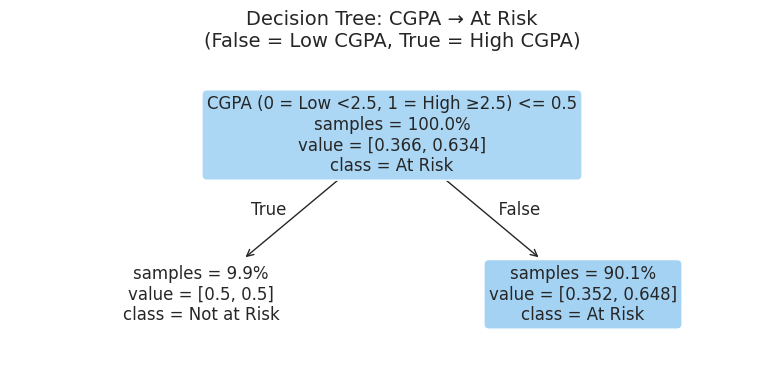

In [ ]:
def categorize_cgpa(cgpa):
    if cgpa < 2.5:
        return 0  # Low
    else:
        return 1  # High

df["CGPA_category"] = df["What is your CGPA?"].apply(categorize_cgpa)
X_cgpa = df[["CGPA_category"]]
clf_cgpa = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf_cgpa.fit(X_cgpa, y)

plt.figure(figsize=(8, 4))
plot_tree(clf_cgpa,
          feature_names=["CGPA (0 = Low <2.5, 1 = High ≥2.5)"],
          class_names=["Not at Risk", "At Risk"],
          filled=True,
          rounded=True,
          impurity=False,
          proportion=True,
          fontsize=12)
plt.title("Decision Tree: CGPA → At Risk\n(False = Low CGPA, True = High CGPA)", fontsize=14)
plt.tight_layout()
plt.show()


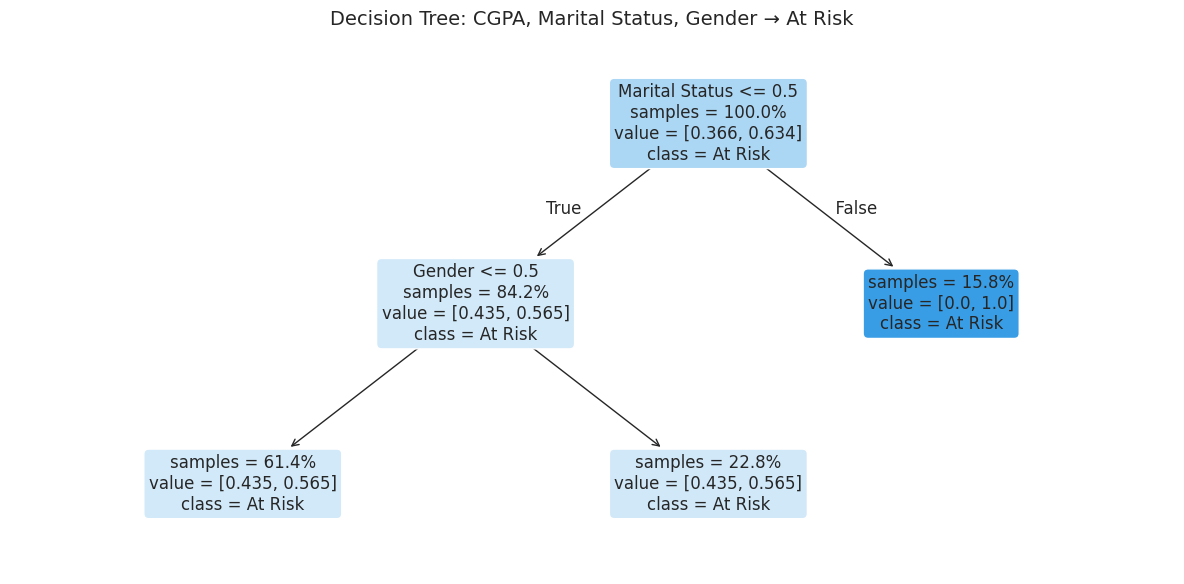

In [ ]:
cgpa_map = {
    "< 1.50": 1.25,
    "1.50 - 1.99": 1.75,
    "2.00 - 2.49": 2.25,
    "2.50 - 2.99": 2.75,
    "3.00 - 3.49": 3.25,
    "3.50 - 4.00": 3.75
}

df["CGPA_numeric"] = df["What is your CGPA?"].map(cgpa_map)

df["CGPA"] = df["CGPA_numeric"].apply(lambda x: 0 if x < 2.5 else 1)

le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["gender"].astype(str))

le_marital = LabelEncoder()
df["Marital"] = le_marital.fit_transform(df["Marital status"].astype(str))

features = ["CGPA", "Marital", "Gender"]
X = df[features]
y = df["At Risk"]

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X, y)

plt.figure(figsize=(12, 6))
plot_tree(clf,
          feature_names=["CGPA (0=Low, 1=High)", "Marital Status", "Gender"],
          class_names=["Not at Risk", "At Risk"],
          filled=True,
          rounded=True,
          impurity=False,
          proportion=True,
          fontsize=12)
plt.title("Decision Tree: CGPA, Marital Status, Gender → At Risk", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

X = df.drop(columns=['At Risk'])
y = df['At Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)  # or remove max_depth to let it grow
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6190476190476191
Precision: 0.6190476190476191
Recall: 1.0
F1 Score: 0.7647058823529411

Confusion Matrix:
 [[ 0  8]
 [ 0 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.62      1.00      0.76        13

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Results and Observations

- Decision tree models show that gender and marital status have some predictive power in determining mental health risk.
- Students with lower CGPA levels appeared more frequently in the "At Risk" category.
- Certain years of study showed higher concentrations of mental health concerns.
- Females reported a slightly higher rate of being at risk compared to males.

Visualizations like countplots helped confirm and visually represent these patterns in the data.


## Limitations

- The dataset is self-reported, which introduces potential bias and inaccuracy.
- Sample size is limited, and results may not generalize.
- There’s class imbalance between “At Risk” and “Not at Risk” students.
- More complex models like random forests or logistic regression were not used for simplicity.


## References

- Dataset: [Kaggle – Student Mental Health](https://www.kaggle.com/datasets/itachi9604/student-mental-health)
- Scikit-learn Documentation: https://scikit-learn.org/
- Seaborn Visualization Library: https://seaborn.pydata.org/
